In [1]:
# code for automatically reloading changes from modules (used for testing)
%load_ext autoreload
%autoreload 2

In [2]:
from single_sqrb_iceberg import Single_SQRB_Experiment
from selene_sim import DepolarizingErrorModel, Stim

In [ ]:
# select parameters and build experiment

n_qubits = 8
seq_lengths = [6, 24]
seq_reps = 10
filename = 'exp_single_SQRB_example.p'

exp = Single_SQRB_Experiment(
    n_qubits, 
    seq_lengths, 
    seq_reps, 
    filename=filename
)
exp.add_settings()

### Run local simulation using Selene

In [4]:
# Setup error model

error_model = DepolarizingErrorModel(
    random_seed=1234,
    # single qubit gate error rate
    p_1q=1e-4,
    # two qubit gate error rate
    p_2q=1e-2,
    # set state preparation and measurement error rates to 0
    p_meas=0,
    p_init=0,
)

In [5]:
# simulate experiment

shots = 100
simulator = Stim()

exp.sim(shots, error_model=error_model, simulator=simulator)

Simulating ...
1/20 circuits complete
2/20 circuits complete
3/20 circuits complete
4/20 circuits complete
5/20 circuits complete
6/20 circuits complete
7/20 circuits complete
8/20 circuits complete
9/20 circuits complete
10/20 circuits complete
11/20 circuits complete
12/20 circuits complete
13/20 circuits complete
14/20 circuits complete
15/20 circuits complete
16/20 circuits complete
17/20 circuits complete
18/20 circuits complete
19/20 circuits complete
20/20 circuits complete


### Submit to Quantinuum Hardware or Emulator backend using Nexus

In [4]:
# Choose domain and login to Nexus

import qnexus
from qnexus.config import CONFIG

CONFIG.domain = "qa.myqos.com"
qnexus.login()

🌐 Browser log in initiated.


╭────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                        │
│         Confirm that the browser shows the following code and click 'allow device':    │
│                                                                                        │
│                                      IiNN8k                                            │
│                                                                                        │
╰────────────────────────────────────────────────────────────────────────────────────────╯

Browser didn't open automatically? Use this link: https://qa.myqos.com/auth/device/browser?otp=IiNN8k7nzlvN4I4UzM-DtZlqtxRzCkkAWjNp6wRSSdncTG_MkrkjTtHEbxRDHXD5f9GYiy4tL3foAZ-1uQEJuA
✅ Successfully logged in as charles.baldwin@quantinuum.com using the browser.


In [10]:
# choose nexus project and setup quantinuum backend config

project = qnexus.projects.get_or_create(name='transport-single-SQRB-example-project')
qnexus.context.set_active_project(project)

backend_config = qnexus.QuantinuumConfig(device_name='Helios-1E', simulator='Stim')

In [11]:
# submit experiment. Returns a qnexus ExecuteJobRef

shots = 100

execute_job_ref = exp.submit(shots, backend_config)

In [13]:
# inspect status of the execution job

qnexus.jobs.status(execute_job_ref)

JobStatus(status=<StatusEnum.ERROR: 'Circuit has errored. Check CircuitStatus.message for error message.'>, message='Circuit has encountered an error.', error_detail="<class 'RuntimeError'>: unknown variant `Extensions`, expected one of `Type`, `BoundedNat`, `String`, `Sequence`, `Variable`\n\nCaused by:\n    0: unknown variant `Extensions`, expected one of `Type`, `BoundedNat`, `String`, `Sequence`, `Variable`\n    1: unknown variant `Extensions`, expected one of `Type`, `BoundedNat`, `String`, `Sequence`, `Variable`", completed_time=None, queued_time=None, submitted_time=datetime.datetime(2025, 6, 12, 16, 43, 3, 909308, tzinfo=datetime.timezone.utc), running_time=None, cancelled_time=None, error_time=datetime.datetime(2025, 6, 12, 16, 43, 4, 571376, tzinfo=datetime.timezone.utc), queue_position=None)

In [ ]:
# retrieve results (once execution job has completed)

exp.retrieve(execute_job_ref)

In [6]:
exp.analyze_results()

IndexError: string index out of range

In [7]:
exp.results

{(6, 0, '000000000000'): {'01110110': 1,
  '00000100': 1,
  '01100010': 1,
  '10000101': 1,
  '11001111': 1,
  '11111001': 1,
  '00011101': 1,
  '01111100': 1,
  '01000011': 1,
  '10010000': 1,
  '10100101': 1,
  '00111100': 1,
  '10010001': 1,
  '01100111': 1,
  '10001000': 1,
  '01001100': 1,
  '01100000': 1,
  '10001100': 1,
  '10011010': 1,
  '11000010': 2,
  '01000000': 1,
  '01010101': 2,
  '01001110': 2,
  '11000000': 1,
  '10111001': 1,
  '01101111': 1,
  '00101010': 1,
  '01111010': 1,
  '11101111': 1,
  '11001001': 2,
  '00000111': 1,
  '11011100': 1,
  '00011010': 1,
  '10101011': 1,
  '11010011': 2,
  '00010100': 1,
  '10001101': 1,
  '00011100': 1,
  '00000110': 1,
  '10001010': 1,
  '00000011': 1,
  '01110001': 1,
  '11000111': 1},
 (6, 1, '000000000000'): {'01011111': 1,
  '11011000': 1,
  '10011000': 1,
  '10010111': 1,
  '11101011': 1,
  '10001011': 1,
  '11010100': 1,
  '11010111': 1,
  '10101001': 1,
  '01000110': 1,
  '11101101': 1,
  '11011011': 1,
  '00001011': 1,

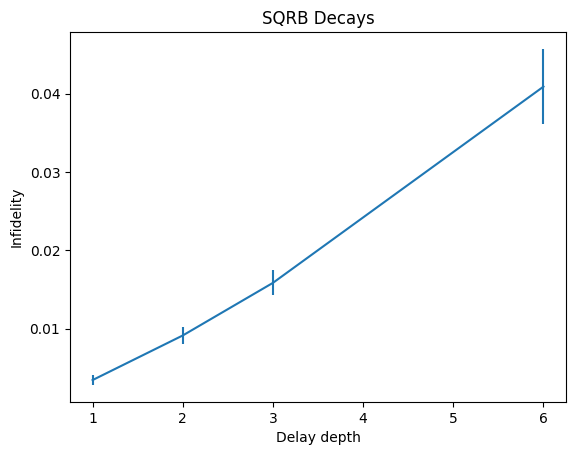

In [13]:
exp.plot_scaling()

In [14]:
# save experiment object to working directory

exp.save()